In [1]:
import numpy as np
import matplotlib.pyplot as plt

生成模拟数据

In [2]:
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [3]:
X = x.reshape(-1, 1)
X.shape
y.shape

(100,)

<function matplotlib.pyplot.show(close=None, block=None)>

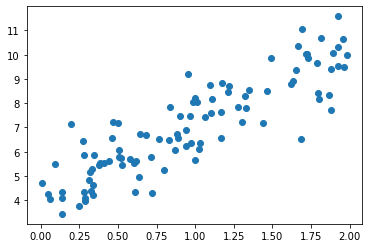

In [4]:
plt.scatter(X,y)
plt.show

**使用梯度下降**

In [5]:
def J(theta, X_b, y):
    try:
        #求损失函数
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [6]:
#对损失函数求导
def dJ_1(theta, X_b, y):
    #向量化
    #return X_b.T.dot(X_b.dot(theta) - y) * 2.0 / len(y)
    #麻烦的方法
    
    #开辟一个theta这么大的空间
    res = np.empty(len(theta))
    #先对theta0求导
    res[0] = np.sum(X_b.dot(theta) - y)
    #用相同的办法分别对其他theta求导
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    #别忘了最后乘上2/m(所有theta求导都出现的产物)
    return res * 2 / len(X_b)

    #改进
    #梯度下降法的向量化，在下面
    #return X_b.T.dot(X_b.dot(theta - y))

In [7]:
def gradient_descent(X_b, y, initial_theta, eta, epsilon=1e-8, n_iters = 1e4):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ_1(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break;
        i_iter += 1
        
    if(i_iter == 1e4):
        print('超过规定循环次数\n')
    return theta

In [8]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [9]:
theta

array([4.18568463, 2.97191091])

In [10]:
y_predict = theta[1] * X + theta[0]

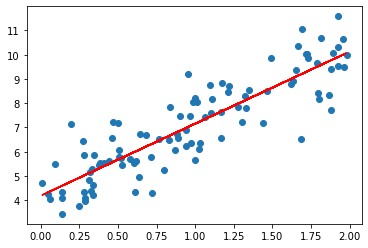

In [11]:
plt.scatter(X,y)
plt.plot(X,y_predict, color = 'r')
plt.show()

In [12]:
def J_2(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

def dJ_2(theta, X_b, y):
    #向量化运算
    return X_b.T.dot(X_b.dot(theta) - y) * 2.0 / len(y)

def gradient_descent_2(X_b, y, initial_theta, eta, epsilon=1e-8, n_iters = 1e4):
    theta = initial_theta
    i_iter_ = 0
    
    while i_iter_ < n_iters:
        gradient = dJ_2(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break;
        i_iter_ += 1
        
    if(i_iter_ == 1e4):
        print('超过规定循环次数\n')
    return theta

In [13]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent_2(X_b, y, initial_theta, eta)

In [14]:
theta

array([4.18568463, 2.97191091])

In [15]:
y_predict = theta[1] * X + theta[0]

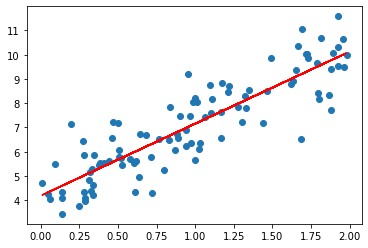

In [16]:
plt.scatter(X,y)
plt.plot(X,y_predict, color = 'r')
plt.show()